In [1]:
import sys
sys.path.append('../xrun')


In [2]:
import gzip
from pathlib import Path

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

from sklearn.metrics import pairwise_distances, pairwise_distances_argmin_min

from xrun.data.loader import load_dataset
from xrun.data.run_info import RunInfo

import re

from pathlib import Path

import numpy as np
import pandas as pd

from IPython.core.display import HTML
from sklearn.metrics import pairwise_distances

from xrun.data.run_info import RunInfo

In [3]:
def extract_dataset(file_path):
    mappings = {
        'covtype': "Covertype",
        "enron": "Enron",
        "hardinstances/benchmark-k30": "Benchmark old ($k=30$)",
        "nytimes": "NYTimes",
        "Tower": "Tower",
        "Census": "Census",
    }
    for k, v in mappings.items():
        if k in file_path:
            return v
    return 'Unmapped'

In [4]:
df_data = pd.read_csv('../data/cluster_curves.txt', header=None, names=["file_path", "k", "cost", "running_time"])
df_data['dataset'] = df_data.file_path.map(extract_dataset)
df_data["normalized_cost"] = df_data.groupby("dataset")["cost"].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

In [5]:
df_data

,file_path,k,cost,running_time,dataset,normalized_cost
0,data/input/USCensus1990.data.txt,10,2.434498e+08,52.611029,Census,1.000000
1,data/input/USCensus1990.data.txt,20,1.842651e+08,107.099072,Census,0.647277
2,data/input/USCensus1990.data.txt,30,1.547890e+08,165.837345,Census,0.471608
3,data/input/USCensus1990.data.txt,40,1.364321e+08,229.147675,Census,0.362207
4,data/input/USCensus1990.data.txt,50,1.248971e+08,281.367148,Census,0.293461
5,data/input/USCensus1990.data.txt,70,1.102682e+08,405.196627,Census,0.206278
6,data/input/USCensus1990.data.txt,100,9.639565e+07,646.419028,Census,0.123601
7,data/input/Tower.txt,10,1.302867e+09,73.535599,Tower,1.000000
8,data/input/USCensus1990.data.txt,200,7.565615e+07,1542.354589,Census,0.000000
9,data/input/Tower.txt,20,6.100211e+08,135.248728,Tower,0.424052


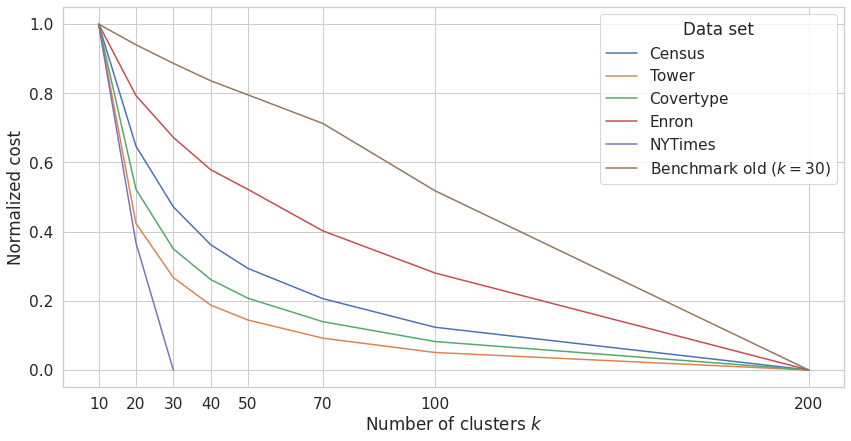

In [6]:
k_values = df_data.k.unique()

with sns.plotting_context("notebook", font_scale=1.4):
    fig, ax = plt.subplots(figsize=(14, 7))
    sns.lineplot(data=df_data, x="k", y="normalized_cost", hue="dataset", ax=ax)
    ax.xaxis.set_ticks(k_values)
    ax.set_xlabel("Number of clusters $k$")
    ax.set_ylabel("Normalized cost")
    ax.legend(title="Data set")
    ax.set_title("");

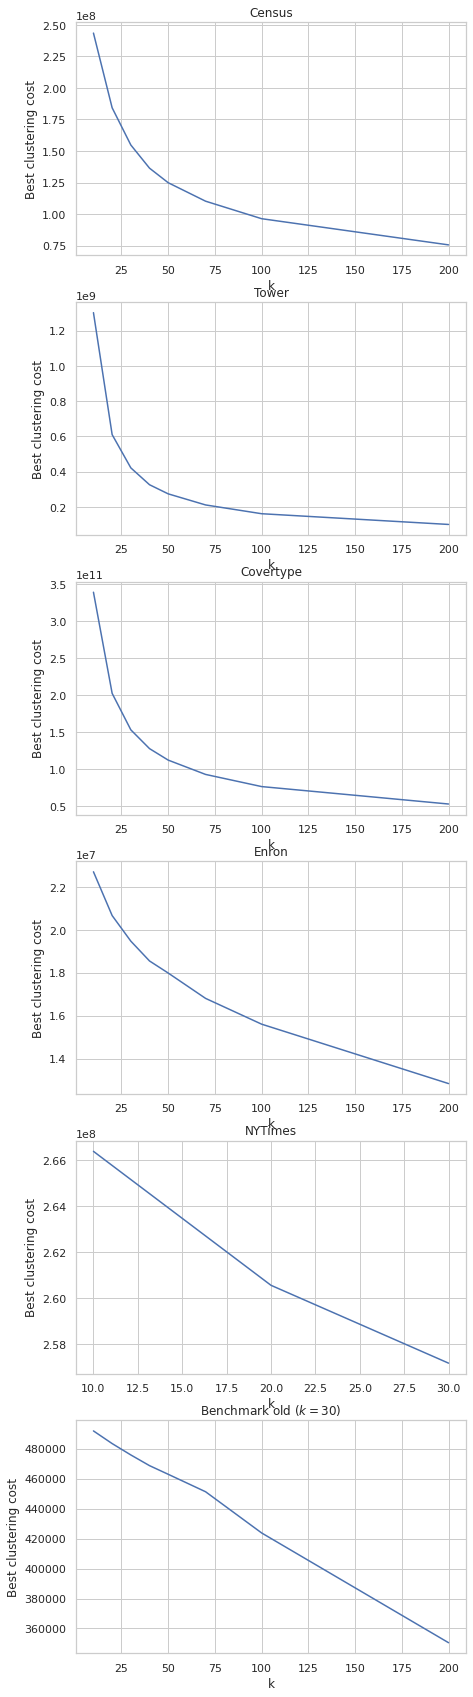

In [7]:
datasets = df_data.dataset.unique()
fig, axes = plt.subplots(nrows=len(datasets), ncols=1, figsize=(7, int(5*len(datasets))))
for i, dataset in enumerate(datasets):
    df_filtered = df_data[df_data.dataset == dataset]
    sns.lineplot(data=df_filtered, x="k", y="cost", ax=axes[i])
    axes[i].set_title(dataset)
    axes[i].set_ylabel("Best clustering cost")
# fig.savefig("best-clustering-costs.pdf")